### **이미지를 이용한 원피스 찾기 시연**

시연을 위한 데이터 파일 압축 해제

In [0]:
!unzip 'drive/My Drive/colab.zip'

필요한 라이브러리 불러오기

In [2]:
from keras.preprocessing.image import img_to_array
from keras.models import load_model
import numpy as np
import argparse
import imutils
import pickle
import cv2
import os
import matplotlib.pyplot as plt
import skimage.io as io
import pandas as pd
import json
from pandas import DataFrame as df
import math
import urllib
%matplotlib inline

Using TensorFlow backend.


사전 정의된 함수 부분  
  이미지 판별, 추천함수, 출력함수

In [0]:
def print_image_label():
    I = io.imread(imagefile)
    plt.imshow(I); plt.axis('off'); plt.show()
    print("{}: {:.2f}%".format(mlb.classes_[0], proba[0] * 100),end='\t\t')#5부 0
    print("{}: {:.2f}%".format(mlb.classes_[18], proba[18] * 100),end='\t\t')#미니 18
    print("{}: {:.2f}%".format(mlb.classes_[8], proba[8] * 100),end='\t\t')#기하학 8
    print("{}: {:.2f}%".format(mlb.classes_[2], proba[2] * 100),end='\t\t')#A라인 1
    print("{}: {:.2f}%".format(mlb.classes_[7], proba[7] * 100),end='\t\t');print();#red 6
    print("{}: {:.2f}%".format(mlb.classes_[1], proba[1] * 100),end='\t\t')#7부
    print("{}: {:.2f}%".format(mlb.classes_[19], proba[19] * 100),end='\t\t')#미디 19
    print("{}: {:.2f}%".format(mlb.classes_[10], proba[10] * 100),end='\t\t')#도트 10
    print("{}: {:.2f}%".format(mlb.classes_[3], proba[3] * 100),end='\t\t')#H라인
    print("{}: {:.2f}%".format(mlb.classes_[6], proba[6] * 100),end='\t\t');print();#green 5
    print("{}: {:.2f}%".format(mlb.classes_[9], proba[9] * 100),end='\t\t')#긴팔
    print("{}: {:.2f}%".format(mlb.classes_[15], proba[15] * 100),end='\t\t')#롱
    print("{}: {:.2f}%".format(mlb.classes_[12], proba[12] * 100),end='\t\t')#레오파드:
    print("{}: {:.2f}%".format(mlb.classes_[11], proba[11] * 100),end='\t\t')#랩
    print("{}: {:.2f}%".format(mlb.classes_[5], proba[5] * 100),end='\t\t');print();#blue
    print("{}: {:.2f}%".format(mlb.classes_[20], proba[20] * 100),end='\t\t\t\t\t')#민소매
    print("{}: {:.2f}%".format(mlb.classes_[13], proba[13] * 100),end='\t\t')#레터링
    print("{}: {:.2f}%".format(mlb.classes_[16], proba[16] * 100),end='\t\t')#머메이드
    print("{}: {:.2f}%".format(mlb.classes_[4], proba[4] * 100),end='\t\t');print();#black
    print("{}: {:.2f}%".format(mlb.classes_[21], proba[21] * 100),end='\t\t\t\t\t')#반팔
    print("{}: {:.2f}%".format(mlb.classes_[14], proba[14] * 100),end='\t\t')#로고
    print("{}: {:.2f}%".format(mlb.classes_[22], proba[22] * 100),end='\t\t')#벌룬
    print()
    print("{}: {:.2f}%".format(mlb.classes_[29], proba[29] * 100),end='\t\t')#캡소매
    print("\t\t\t{}: {:.2f}%".format(mlb.classes_[17], proba[17] * 100),end='\t\t')#무지
    print("{}: {:.2f}%".format(mlb.classes_[25], proba[25] * 100),end='\t\t');print();#언밸런스
    print("\t\t\t\t\t\t{}: {:.2f}%".format(mlb.classes_[23], proba[23] * 100),end='\t')#스트라이프
    print("{}: {:.2f}%".format(mlb.classes_[33], proba[33] * 100),end='\t\t');print();#플리츠주름
    print("\t\t\t\t\t\t{}: {:.2f}%".format(mlb.classes_[24], proba[24] * 100),end='\t\t')#아가일
    print()
    print("\t\t\t\t\t\t{}: {:.2f}%".format(mlb.classes_[26], proba[26] * 100),end='\t\t')#체크
    print()
    print("\t\t\t\t\t\t{}: {:.2f}%".format(mlb.classes_[27], proba[27] * 100),end='\t\t');print();#츄리닝
    print("\t\t\t\t\t\t{}: {:.2f}%".format(mlb.classes_[28], proba[28] * 100),end='\t\t');print();#캐릭터
    print("\t\t\t\t\t\t{}: {:.2f}%".format(mlb.classes_[31], proba[31] * 100),end='\t\t\t\t\t');print();#프린트
    print("\t\t\t\t\t\t{}: {:.2f}%".format(mlb.classes_[32], proba[32] * 100),end='\t\t\t\t\t');print();#플라워
def classify():
    image = cv2.imread(imagefile)
    output = imutils.resize(image, width=400)
    image = cv2.resize(image, (96, 96))
    image = image.astype("float") / 255.0
    image = img_to_array(image)
    image = np.expand_dims(image, axis=0)
    print("[INFO] classifying image...")
    proba = model.predict(image)[0]
    return(proba)
def recommend():
  df1 = pd.DataFrame(proba)
  df1 = df1.T
  df1.columns=df2.columns
  merge_df = pd.merge(df1,df2, how='outer')
  from sklearn.metrics.pairwise import cosine_similarity
  log=0
  for (black,blue,green,red) in zip(merge_df[5],merge_df[6],merge_df[7],merge_df[8]):
      max_color=max([black,blue,green,red])
      if max_color==black:
          black=black/2
      else:
          black=black+4
      if max_color==blue:
          blue=blue/2
      else:
          blue=blue+4
      if max_color==black:
          green=green/2
      else:
          green=green+4
      if max_color==black:
          red=red/2
      else:
          red=red+4
      merge_df[5][log]=black
      merge_df[6][log]=blue
      merge_df[7][log]=green
      merge_df[8][log]=red
      log=log+1
  cosine = pd.DataFrame(cosine_similarity(merge_df))
  result=cosine[0].sort_values(ascending=False)
  print_recomm(result)
def recommend2():
  df1 = pd.DataFrame(proba)
  df1 = df1.T
  df1.columns=df2.columns
  merge_df = pd.merge(df1,df2, how='outer')
  from sklearn.metrics.pairwise import cosine_similarity
  log=0
  for (black,blue,green,red) in zip(merge_df[5],merge_df[6],merge_df[7],merge_df[8]):
      merge_df[5][log]=math.log(black*10**8)
      merge_df[6][log]=math.log(blue*10**2)
      merge_df[7][log]=math.log(green*10**2)
      merge_df[8][log]=math.log(red*10**2)
      log=log+1
  cosine = pd.DataFrame(cosine_similarity(merge_df))
  result=cosine[0].sort_values(ascending=False)
  print_recomm(result) 
def recommend3():
  df1 = pd.DataFrame(proba)
  df1 = df1.T
  df1.columns=df2.columns
  merge_df = pd.merge(df1,df2, how='outer')
  from sklearn.metrics.pairwise import cosine_similarity
  log=0
  for (black,blue,green,red) in zip(merge_df[5],merge_df[6],merge_df[7],merge_df[8]):
      max_color=max([black,blue,green,red])
      if max_color==black:
          black=black/5
      else:
          black=black+4
      if max_color==blue:
          blue=blue/5
      else:
          blue=blue+4
      if max_color==black:
          green=green/5
      else:
          green=green+4
      if max_color==black:
          red=red/5
      else:
          red=red+4
      merge_df[5][log]=math.log(black*10**2)
      merge_df[6][log]=math.log(blue*10**2)
      merge_df[7][log]=math.log(green*10**2)
      merge_df[8][log]=math.log(red*10**2)
      log=log+1
  cosine = pd.DataFrame(cosine_similarity(merge_df))
  result=cosine[0].sort_values(ascending=False)
  print_recomm(result)
def print_recomm(result):
  print("다음 상품을 추천합니다.")
  for (image, link, name) in zip(df3.iloc[result.index[1:recomm_item_num]]['imagefile'], 
                                 df3.iloc[result.index[1:recomm_item_num]]['link'],
                                 df3.iloc[result.index[1:recomm_item_num]]['name']):
      I = io.imread(imagefolder+image)
      plt.imshow(I); plt.axis('off'); plt.show()    
      print(name)
      print(link)

모델, 레이블, 데이터베이스, 평가점수 등 필요한 파일의 경로,  
 추천 받을 아이템의 후보 수

In [0]:
dbfile='./final_200424_non-color.csv'
ratings='result4.csv'
imagefolder='./0423_final_crawl/'
modelfile='fashion4.model'
labelbinfile='mlb4.pickle'
recomm_item_num=15

미리 학습된 모델과 레이블 로딩

In [28]:
#load model
# load the trained convolutional neural network and the multi-label
print("모델과 평가데이터, 데이터베이스를 불러옵니다...")
model = load_model(modelfile)
mlb = pickle.loads(open(labelbinfile, "rb").read())
df2 = pd.read_csv(ratings,index_col=0,header=None)
df3 = pd.read_csv(dbfile,index_col=0)

모델과 평가데이터, 데이터베이스를 불러옵니다...


웹주소로 이미지를 받아서 이미지를 판독

이미지 주소https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcT93K71SbATZKF3EdTHmtYKyExEehAje4hsoA8Zf8GgOztzMWi6&usqp=CAU
[INFO] classifying image...


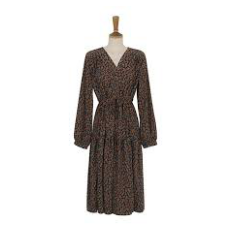

5부: 0.00%		미니: 20.66%		기하학: 0.00%		A라인: 17.29%		red: 1.19%		
7부: 2.31%		미디: 22.39%		도트: 23.83%		H라인: 18.48%		green: 0.01%		
긴팔: 98.04%		롱: 34.99%		레오파드: 0.00%		랩: 0.28%		blue: 0.11%		
민소매: 0.23%					레터링: 0.01%		머메이드: 5.36%		black: 98.68%		
반팔: 0.24%					로고: 0.06%		벌룬: 1.10%		
캡소매: 0.01%					무지: 14.98%		언밸런스: 21.94%		
						스트라이프: 0.70%	플리츠주름: 24.12%		
						아가일: 0.07%		
						체크: 36.70%		
						츄리닝: 0.00%		
						캐릭터: 0.00%		
						프린트: 0.30%					
						플라워: 7.35%					


In [65]:
url = input("이미지 주소")
resource = urllib.request.urlopen(url)
output = open("file01.jpg","wb")
output.write(resource.read())
output.close()
imagefile='file01.jpg'
proba=classify()
print_image_label()

상품 추천

다음 상품을 추천합니다.


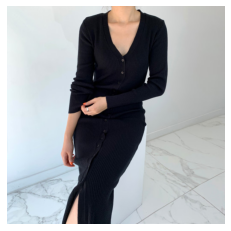

가을 니트 롱가디건 골지 원피스
https://cr2.shopping.naver.com/adcr.nhn?x=P6fZtjqmQFX%2BvZpOZbK2Q%2F%2F%2F%2Fw%3D%3DsXxrH7rxA5AQj0uFn1XanyPlX%2BZAwORCF3OLIsQ%2FtszUdHuBCWZyMkpsniW8lx8qCAB35GIVUgoh67cqq9Ikxsql6LyjznO%2FsH0Pfuqo3X76p4IBYqxUkkcWo13LGeTJN4O%2FQbzb%2BX6TyvmbpYGYSgKrX%2BSa7%2B5YEt9OZt5DXPg6FvTSSlbHDV9clps7yxUvUPU0Up09lSB70W8xz9n81aX1wFkbO30K4iH8DIsVS%2F5IqUOY4GKYy22Pvlriy3rEEN4pzqagytlO3v%2Ffm458szbnorlAFBEuxAUIhghMF0kClopbpieagPRoipJ%2FEZ19DagiK5o1NShQDksdLRQC9awVOsrG0SlPHzAh5vONfPLCzJKa%2Fbztbz171vCeudfkufncl%2BaTSg0UNXFNJEDIgjJ6np8kmMNSxsvYXINln56wwD5q%2B29nrcg2d0kv6vAipGtRq3Avb5ubwsh%2BHLuAJ6jPE5hdlbbFW9K3N4aNpE5FVGP4v290w%2BZC4jApYNs5Zhecuoz9LF%2FGbAMbb7NhqIcFF0aietP8SfGTnp9h19yvWHcsIGbuYWJJJPRdhhiqREXC0sgLA4sNOibI6HzsCZR6p8N19TlKndV3GAY2Sbg8uZanPwYCeH4wXhXs9xePXOo%2BjsU1uzjM%2F6LCtNhEfUH9v3znedSdmUj3K7ESSVaEQy5aZ6Sk12TvnqIrQE0c%2FOo0jdEKElR4cjvelg%2BJQyxu6A7OxBSpPGE93I2MyJRInA5kp%2Fd%2BPqOCvlMR6lIIC&nv_mid=82193750448&cat_id=50000807


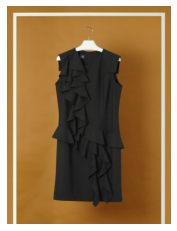

[YEEZ SIGNATURE LINE] 이즈 시그니처 러플 민소매 원피스 - 블랙/ RUFFLE DRESS [주문제작]
https://cr2.shopping.naver.com/adcr.nhn?x=xOwouNxoDNqxe%2BiVaLDtwf%2F%2F%2Fw%3D%3DsLdIslWDl1TlGNYSvQd6JBxFI0hMVB12hOoaVoL77E4Fbdubpt9tN4mixuie9UiVvsmH3F3gJrbZlLZ%2F0QzWT8mM5ywTNbvkDUq403b3HrmP3mrP9L3bKHJ%2FdpwvsNiiCIB5LloZU0HI8bgH%2FF3By%2FeL3ESYiJtzgVhFw1S%2Bm1iwyg0jV7SWmyzCXC3ME2qDCc%2Bz03%2Fk6E3umo8kRsQ%2BuklcMXxsZ5YxnXDTf1Kyc58Mi1HFsgxseWDFjvgqFvyJR8XM4P7RIMtA9J0DxvskKs1JvJaswEAHzh4%2BeL8l2tv4xYwKYCF2wSheYXztta1k90KwhYrfAVEmMb%2FMhECMzRrr9GyESxlku1GP2cO77NQ%2FPrn3Zab3MPTOjyzJ0ntbO8iMQ5TJOVRopEulqz%2BJtkY4FIdX0RH9maAYxxSnIi%2FFJFSBsImoAOzcVleov1MKLcXnlpsh3md%2FQ5tbXWtUHr6Lyq5HLvYfu0dm4ijbtXMQyNajfXOO1bBNb%2BFhyL67VRPINUUeJLkeGsdPCQSPJ7zv1hkdKTi948mXM0zrXBO79sqOpOfjbkOHOw7TSSN%2B1zvJs7unSibICzgDRK0SLlKolt6rbp8O6dgAVZ5nr8No9r40zH7vjvCG6%2FwwMFZyu8mXEexW%2Fc6NlFkfc1sqBS%2Bm3ZxeAumuLb7rWKJ2E6jo1AZ2Sbt%2FImwF222IpB9JqzjbUGZN3a%2Bio6G2y%2B7CbEEx%2BcwIDvDzOJwuqEI0wWLAx8DS2rvCFh4ZoAb%2F5XgwUqaHM04XVFjuS7kzAHMXU72acleUJKLLHIz

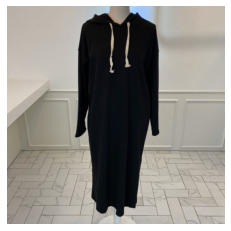

[재고세일/당일배송] 데일리 후드 원피스 블랙 (3color)
https://cr2.shopping.naver.com/adcr.nhn?x=dg7%2BMjZhlNX4mb9HhJmpzP%2F%2F%2Fw%3D%3DsoVTBwEOuu4mM0c%2Bacd4cGwWAjCdfaGnZjmKhDeR8D8RdgKZgszK%2BsSt89MtYbPzW5Oz7O3o1ttNoCD2jsp%2BP1WVyf4fEeIwpi1WJR%2F5%2FpReVK5hNxRUBW3Fkia%2BRgsFTyNKGx5TkBV09dsZq47%2FWxzbiPdx%2BeQNBCzNoKsV9mDUzoqpHj94c9BkhEyvisYrRUaGimURpLp1cstwbh%2FL6ye56vr9h9VoFduCJdN2ys%2BL8sDxCrG1R0O6gc7aEEhECTMzjO1qHd79c8QLJYT7zyA7TOu%2BiZGPPbCns0fxzoFb4FjQLKtgpdaxOC6%2FeJ5KosPFNkchYwWiua4avTMsWH6fCLd0EJlKtx3WA4Dq2fB%2FjmySmDl0ZssQ8FMuMx4A5U5%2FcEWWoS3ExaksoiB9qxvGhB8Ps6FHHxGqpxVzRGw12fZAsrJd5mnnkur1pqtZNo5ALJ4IyRUWY1Lh4ckgGZVsICs5QJCBqnDlF0LlFd59VilYg788Y%2FP%2BPrKHQZ3gujGpLk6wdjAEG3Xu9Ps7oWDnEpmSZtHoAf%2BQCIcjVZq%2FnV5Y3bQ1vx%2BveifW73KH7QVGXUH12UlN9XoA8FfFbaJA%2FTbB98OCK11LLZAN47GsLVrDNbnC%2BOJHTsHblJ09wiXTbQIJkhKxEum044Kssg%2BMmkrcwsgtQvScnW7IHDXrMtCjpCfI79VWS3qhaHXctPU39JE8Yyl01OAElW94XQW4tHSw0ckqdeaTYztuEluw2%2Fc6yPxcvx9eXHdg%2B%2BrhV2Avm3Z7bnJfuanlCKRZ1Cw%3D%3D&nv_mid=82308594280&cat_id=50000807


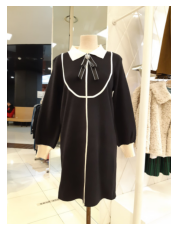

밸리걸  벌룬소매니트원피스  697390
https://cr2.shopping.naver.com/adcr.nhn?x=meLJesjPQvqjA%2B2fSbxUd%2F%2F%2F%2Fw%3D%3DsDGIJdIk04205KESK6QjtZ0c7lPYjGbpZh40d6xLnzTNwosHZvXgQ5D0u1uDRE2ygzAdE9CnKS3Ww3OUk%2F5ldNWVyf4fEeIwpi1WJR%2F5%2FpReVK5hNxRUBW3Fkia%2BRgsFTCBoKAgDuLEvUVlgGfcevzuCGHGm1UnFyv9qih7hRy3OgQmqDKn5ZSqkMXcuDL%2FglUaGimURpLp1cstwbh%2FL6ye56vr9h9VoFduCJdN2ys%2BL8sDxCrG1R0O6gc7aEEhECM7GfzsDPjcKHDxFNpXSDqw7TOu%2BiZGPPbCns0fxzoFb4FjQLKtgpdaxOC6%2FeJ5KosPFNkchYwWiua4avTMsWH6fCLd0EJlKtx3WA4Dq2fB8bZjBlALgznsaDOizXzCHzwFmm%2BPSy6lMiurE8%2BBkYQfGhB8Ps6FHHxGqpxVzRGw1XQwS8u5VqP3IAw2X6K%2FS2tCzoyJHdpnDQ3dOhMfkBxGeztGibD7EtdoMDPckpIkE7g%2F7DA69EyYcSVKlLATynC6F%2BBtyLYBRPrlrX0PBYSiReVvcHOJcqWUtIvB6HFq8WHSsZvj2FX08yAcwe%2BNBwhQnHt2CZtyltECjADrGEEhQYWdFwoYUtEZ4tpWKi3q57vbl1h%2BeaYKSQCMSZJmDX28zM9FB37WxA9ddmqvLmefWttAD6xS80epMTKV73ttXTR9fcP79mI81pgyRR%2BfZo7FzKr5x5ijr1O0h%2FOk6gmeTzpAGy9KRsnqXRZOafq6uQ0b2%2BzB1M0Tg%2FSQcTgmZF&nv_mid=82320924124&cat_id=50000807


In [92]:
recommend()

다음 상품을 추천합니다.


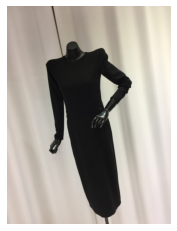

(세일)기본 블랙 깔끔 h라인 슬림핏 하객룩원피스  교환환불X
https://cr2.shopping.naver.com/adcr.nhn?x=iCHIb30k36C1Ptf7jhTEnv%2F%2F%2Fw%3D%3DsLMFiq2Yldaddgk2CrVWBEJFwFJbGXV05%2B7DuTn0CtR2%2BZNm2IAoKKpZwcdWRlh0obF%2Bm5%2B7ZbUOseaJSRrg1nIYlFAdf1OFsetsPTCIBnAtPOdYsvqvAV2kweJQXbUmGufrPmRVnpkpcjvTcA0Zgs5rRBBcGHvCY%2B0sG2G9t%2BHaPbvEzo8G4JumsAnJ2vQP1WEr4Lu5t53ESTApzu1Eu9J9%2Bw5fyb2S%2B0WKUIuNO0Akl8HAYn6NkzRDrGPGQ2ZUxniOV7nkwpdMlvidewxB1LUaAb%2FOdjaJ2XbA%2BJKlL%2B499LsW4RgipVPKA%2F2IN4cAJ4mmic2vQ8l3OPvPdLBTB5%2B6UB08G4lR0a9fquA%2FPNrK3wb20bMAvjFk5FVepQ7CstDT%2Bmimr5RsPMfFKuiQ3T44FIdX0RH9maAYxxSnIi%2FGwJLo6tdVraPsLcxho3Do4XS%2FeIQcr2dBgm3%2FBcBmUwh68%2FEdDVqJ1sVTgfF2bf%2FZwIiaJ7ZB61U%2B4b3DXdWwCbd0JBtaoogP%2F0vOxJEwehWljhEtZYWOKtRXQzUap2V2hv%2F9GmEEFL%2F2gtawqJyrGlWsqNgTeiyLBNnlO0HYj9p8RGzWmT1tb3h3JA3nWleyaQX6SEBxSrFfrXS5L6cilj2hWobivTJLZTnU59%2BvYI%2FIuntEhQZTqvzsdCg8MgsavSBT3Geqgs3wEoKuuqp%2BIRHaEo8REgAul2styUtC%2B7sH3SJWVXm4YEER%2FofhGitqIhpz8hoK%2F79zmS%2FDKay7Sl8u2xOHF6FqyJOfGMyiklfFRN2QlA%2FQPIuNMbfNbQ7qXpOUXQZVQ

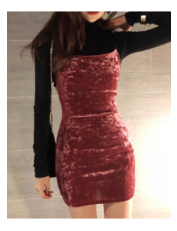

[무배] 벨벳 뷔스티에 미니원피스
https://cr2.shopping.naver.com/adcr.nhn?x=3n2ZTJeZArq4fDOR7zqNFP%2F%2F%2Fw%3D%3DsC2Q%2F40EFDPj0hpH72e9W8kc62KlXwjUb70Su3k7of026bawz9WkeUXR3zKkO8ISjSwshKbwbTQAymJCjk1Lyx2M5ywTNbvkDUq403b3HrmP3mrP9L3bKHJ%2FdpwvsNiiCmKjwCvsxtRV%2BwVi6g39zBtamD7pkkHw1fj%2F9yTbB5RpMZguU5F89ihn3JeeL21V%2Fc%2Bz03%2Fk6E3umo8kRsQ%2BuklcMXxsZ5YxnXDTf1Kyc58NAcUq0lIPF%2FVcEws%2Fy44epy4xpR52QXOB%2F08ZB5PHEIFJvJaswEAHzh4%2BeL8l2tv4xYwKYCF2wSheYXztta1k90KwhYrfAVEmMb%2FMhECMzRrr9GyESxlku1GP2cO77NQ8h%2FA%2BrP%2B%2F1Ss0cgUJPypx3jQ8tgYzFHbeZlcdYovbBLI4FIdX0RH9maAYxxSnIi%2FFPswZpBTLauKdwCS0tKNK%2BIlR1mTJdXIZLXvq3mj3oD19IULIYN4PINtZw1NoQSisYjbQOLzmN33mYPL8ob3%2Fqy2Hfsg6CL0Hv2kwLy8HLjF0pL7Rl%2BIPDq1D4V77PjaHeD86GQ%2FgSRNz5IfRV7f0WdrmW%2FZzqYS4Ye802w%2BYbCvxHjo4AN4dD5mdDtKQGf62j9VW%2FDnSgWA2Ti9nnzjPcyy3p0tmtjc5lA0uaXrQAWwf3lSVwlztjoCmWuOEVT9MVDqQODyHamC82jrGH2z5j7FzKr5x5ijr1O0h%2FOk6gmfbUw%2BSHGzwP%2Bf12shrG99dV9ljkHoZHIlSx8iE1dSzK&nv_mid=81489577742&cat_id=50000807


In [87]:
recommend2()

다음 상품을 추천합니다.


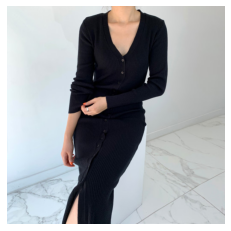

가을 니트 롱가디건 골지 원피스
https://cr2.shopping.naver.com/adcr.nhn?x=P6fZtjqmQFX%2BvZpOZbK2Q%2F%2F%2F%2Fw%3D%3DsXxrH7rxA5AQj0uFn1XanyPlX%2BZAwORCF3OLIsQ%2FtszUdHuBCWZyMkpsniW8lx8qCAB35GIVUgoh67cqq9Ikxsql6LyjznO%2FsH0Pfuqo3X76p4IBYqxUkkcWo13LGeTJN4O%2FQbzb%2BX6TyvmbpYGYSgKrX%2BSa7%2B5YEt9OZt5DXPg6FvTSSlbHDV9clps7yxUvUPU0Up09lSB70W8xz9n81aX1wFkbO30K4iH8DIsVS%2F5IqUOY4GKYy22Pvlriy3rEEN4pzqagytlO3v%2Ffm458szbnorlAFBEuxAUIhghMF0kClopbpieagPRoipJ%2FEZ19DagiK5o1NShQDksdLRQC9awVOsrG0SlPHzAh5vONfPLCzJKa%2Fbztbz171vCeudfkufncl%2BaTSg0UNXFNJEDIgjJ6np8kmMNSxsvYXINln56wwD5q%2B29nrcg2d0kv6vAipGtRq3Avb5ubwsh%2BHLuAJ6jPE5hdlbbFW9K3N4aNpE5FVGP4v290w%2BZC4jApYNs5Zhecuoz9LF%2FGbAMbb7NhqIcFF0aietP8SfGTnp9h19yvWHcsIGbuYWJJJPRdhhiqREXC0sgLA4sNOibI6HzsCZR6p8N19TlKndV3GAY2Sbg8uZanPwYCeH4wXhXs9xePXOo%2BjsU1uzjM%2F6LCtNhEfUH9v3znedSdmUj3K7ESSVaEQy5aZ6Sk12TvnqIrQE0c%2FOo0jdEKElR4cjvelg%2BJQyxu6A7OxBSpPGE93I2MyJRInA5kp%2Fd%2BPqOCvlMR6lIIC&nv_mid=82193750448&cat_id=50000807


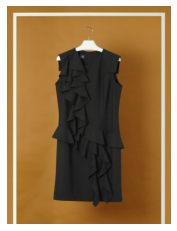

[YEEZ SIGNATURE LINE] 이즈 시그니처 러플 민소매 원피스 - 블랙/ RUFFLE DRESS [주문제작]
https://cr2.shopping.naver.com/adcr.nhn?x=xOwouNxoDNqxe%2BiVaLDtwf%2F%2F%2Fw%3D%3DsLdIslWDl1TlGNYSvQd6JBxFI0hMVB12hOoaVoL77E4Fbdubpt9tN4mixuie9UiVvsmH3F3gJrbZlLZ%2F0QzWT8mM5ywTNbvkDUq403b3HrmP3mrP9L3bKHJ%2FdpwvsNiiCIB5LloZU0HI8bgH%2FF3By%2FeL3ESYiJtzgVhFw1S%2Bm1iwyg0jV7SWmyzCXC3ME2qDCc%2Bz03%2Fk6E3umo8kRsQ%2BuklcMXxsZ5YxnXDTf1Kyc58Mi1HFsgxseWDFjvgqFvyJR8XM4P7RIMtA9J0DxvskKs1JvJaswEAHzh4%2BeL8l2tv4xYwKYCF2wSheYXztta1k90KwhYrfAVEmMb%2FMhECMzRrr9GyESxlku1GP2cO77NQ%2FPrn3Zab3MPTOjyzJ0ntbO8iMQ5TJOVRopEulqz%2BJtkY4FIdX0RH9maAYxxSnIi%2FFJFSBsImoAOzcVleov1MKLcXnlpsh3md%2FQ5tbXWtUHr6Lyq5HLvYfu0dm4ijbtXMQyNajfXOO1bBNb%2BFhyL67VRPINUUeJLkeGsdPCQSPJ7zv1hkdKTi948mXM0zrXBO79sqOpOfjbkOHOw7TSSN%2B1zvJs7unSibICzgDRK0SLlKolt6rbp8O6dgAVZ5nr8No9r40zH7vjvCG6%2FwwMFZyu8mXEexW%2Fc6NlFkfc1sqBS%2Bm3ZxeAumuLb7rWKJ2E6jo1AZ2Sbt%2FImwF222IpB9JqzjbUGZN3a%2Bio6G2y%2B7CbEEx%2BcwIDvDzOJwuqEI0wWLAx8DS2rvCFh4ZoAb%2F5XgwUqaHM04XVFjuS7kzAHMXU72acleUJKLLHIz

In [88]:
recommend3()